<a href="https://colab.research.google.com/github/CR-Reyes/Fiscomp/blob/master/QuantumTunneling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tunelamiento cuántico

Esta actividad explora el fenómeno cuántico de tunelamiento que ocurre cuando un estado cuántico atraviesa una barrera de potencial de una energía mayor a la suya. En primer lugar importo las librerías necesarias para graficar y hacer los cómputos numéricos. De igual manera, inicializo las constantes del programa y muestro el potencial con el que el estado va a interactuar.

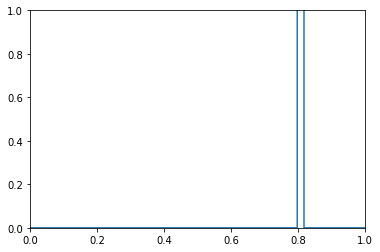

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.linalg as la

# Constantes
win = 1                     #ventana numérica
n = 100                    #no. de puntos
x = np.linspace(0, win, n)  #vector de posición
V = np.zeros(n)             #vector de potencial
V[round(4*n/5)] = 1e3       #introduzco un pico de potencial

# Gráfica
plt.plot(x, V)
plt.axis([0, 1, 0, 1])
plt.show()

In [2]:
# Natural -> Matriz NxN
# produce el operador matricial de segunda derivada para
#   vectores de tamaño N 
def dy2d2x(n):
    matrix = np.zeros([n, n])
    diagonal = np.ones(n)
    matrix += np.diag(diagonal[1:], -1)
    matrix += np.diag(diagonal[1:], 1)
    matrix += np.diag(diagonal * 2, 0)
    return matrix

# Natural -> Vector
# produce un snapshot de la distribución de probabilidad
#   que evoluciona en función del Hamiltoniano ∇^2+V(x)
def pdf(t):
    global n, x, V
    H = dy2d2x(n) + np.diag(V, 0)
    gausspulse = np.exp(-500*(x-.6)**2) * np.exp(1000j * x)
    pdf = np.abs(la.expm(-1j*H*t) @ gausspulse)**2
    return pdf

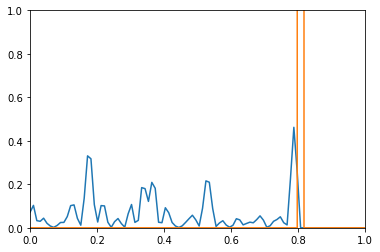

In [4]:
import matplotlib.animation as animation

#inicializar gráfica
fig, ax = plt.subplots()
line, = ax.plot(x, pdf(0))
ax.axis([0, 1, 0, 1])
ax.plot(x, V)

def init():  #limpiar
    line.set_ydata([np.nan] * len(x))
    return line,

def animate(i):
    line.set_ydata(pdf(i))  #actualizar
    return line,

ani = animation.FuncAnimation(
    fig, animate, frames=int(1e3), init_func=init,
    interval=20, blit=True, save_count=50)

ani.save("tunneling.mp4")
plt.show()